# Genus of Surfaces: A Topological Invariant

## Introduction

In topology, the **genus** of a connected, orientable surface is a fundamental topological invariant that characterizes the surface's "complexity" in terms of the number of handles (or holes) it possesses. Informally, the genus counts how many "donut holes" a surface has.

## Mathematical Definition

For a compact, connected, orientable surface $S$, the **genus** $g$ is defined as the maximum number of cuttings along non-intersecting closed simple curves without rendering the surface disconnected.

### Classification Theorem

The **Classification Theorem for Compact Surfaces** states that every compact, connected, orientable surface is homeomorphic to exactly one of the following:

$$S_g = \underbrace{T^2 \# T^2 \# \cdots \# T^2}_{g \text{ copies}}$$

where $T^2$ denotes the torus and $\#$ denotes the connected sum operation. The surface $S_g$ has genus $g$.

### Standard Examples

| Surface | Genus $g$ | Description |
|---------|-----------|-------------|
| Sphere $S^2$ | 0 | No handles |
| Torus $T^2$ | 1 | One handle (donut shape) |
| Double Torus | 2 | Two handles |
| $n$-Torus | $n$ | $n$ handles |

## Euler Characteristic Relation

The genus is intimately connected to the **Euler characteristic** $\chi$ through the formula:

$$\chi(S_g) = 2 - 2g$$

For a surface triangulated with $V$ vertices, $E$ edges, and $F$ faces, the Euler characteristic is:

$$\chi = V - E + F$$

This yields the genus formula:

$$g = \frac{2 - \chi}{2} = \frac{2 - (V - E + F)}{2} = 1 - \frac{V - E + F}{2}$$

## Gauss-Bonnet Theorem

The **Gauss-Bonnet Theorem** provides a profound connection between the genus (topology) and the Gaussian curvature $K$ (geometry):

$$\int_S K \, dA = 2\pi \chi(S) = 2\pi(2 - 2g) = 4\pi(1 - g)$$

This remarkable result shows that:
- **Sphere** ($g=0$): Total curvature $= 4\pi$
- **Torus** ($g=1$): Total curvature $= 0$
- **Double Torus** ($g=2$): Total curvature $= -4\pi$

## Algebraic Topology Perspective

The genus also appears in the first homology group. For an orientable surface of genus $g$:

$$H_1(S_g; \mathbb{Z}) \cong \mathbb{Z}^{2g}$$

The **Betti numbers** are:
- $b_0 = 1$ (connected)
- $b_1 = 2g$ (number of independent cycles)
- $b_2 = 1$ (orientable)

And the Euler characteristic satisfies:

$$\chi = b_0 - b_1 + b_2 = 1 - 2g + 1 = 2 - 2g$$

## Computational Visualization

We now implement parametric representations of surfaces with different genera and visualize them using matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Set up high-quality plotting
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.dpi'] = 100

In [2]:
def sphere(u, v):
    """
    Parametric representation of a sphere (genus 0).
    
    Parameters:
        u: azimuthal angle in [0, 2π]
        v: polar angle in [0, π]
    
    Returns:
        (x, y, z) coordinates
    """
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    return x, y, z


def torus(u, v, R=2, r=0.7):
    """
    Parametric representation of a torus (genus 1).
    
    Parameters:
        u, v: angles in [0, 2π]
        R: major radius (distance from center to tube center)
        r: minor radius (tube radius)
    
    Returns:
        (x, y, z) coordinates
    """
    x = (R + r * np.cos(v)) * np.cos(u)
    y = (R + r * np.cos(v)) * np.sin(u)
    z = r * np.sin(v)
    return x, y, z


def double_torus(u, v):
    """
    Parametric approximation of a double torus (genus 2) using
    a figure-8 cross-section approach.
    
    This creates a surface that wraps around a figure-8 path,
    effectively creating two connected tori.
    
    Parameters:
        u: parameter along the figure-8 path [0, 2π]
        v: parameter around the tube [0, 2π]
    
    Returns:
        (x, y, z) coordinates
    """
    # Figure-8 (lemniscate-like) path in the xy-plane
    a = 2.0  # Scale factor
    r = 0.5  # Tube radius
    
    # Parametric figure-8 curve
    scale = a / (1 + np.sin(u)**2)
    cx = scale * np.cos(u)
    cy = scale * np.sin(u) * np.cos(u)
    
    # Compute tangent vector for Frenet frame
    dcx = -a * np.sin(u) * (1 + np.sin(u)**2 + 2*np.cos(u)**2) / (1 + np.sin(u)**2)**2
    dcy = a * (np.cos(2*u) * (1 + np.sin(u)**2) - 2*np.sin(u)*np.cos(u)*np.sin(u)*np.cos(u)) / (1 + np.sin(u)**2)**2
    
    # Normalize tangent
    norm = np.sqrt(dcx**2 + dcy**2)
    norm = np.where(norm < 1e-10, 1e-10, norm)  # Avoid division by zero
    tx, ty = dcx / norm, dcy / norm
    
    # Normal in xy-plane (perpendicular to tangent)
    nx, ny = -ty, tx
    
    # Create tube around the figure-8
    x = cx + r * nx * np.cos(v)
    y = cy + r * ny * np.cos(v)
    z = r * np.sin(v)
    
    return x, y, z


def triple_torus(u, v):
    """
    Parametric approximation of a triple torus (genus 3) using
    a trefoil-like path approach.
    
    Parameters:
        u: parameter along the path [0, 2π]
        v: parameter around the tube [0, 2π]
    
    Returns:
        (x, y, z) coordinates
    """
    # Rose curve with 3 petals
    a = 2.0
    r = 0.35  # Tube radius
    
    # 3-petal rose curve: r = a*cos(3θ)
    rose_r = a * np.cos(3 * u)
    cx = rose_r * np.cos(u)
    cy = rose_r * np.sin(u)
    
    # Compute tangent
    dr = -3 * a * np.sin(3 * u)
    dcx = dr * np.cos(u) - rose_r * np.sin(u)
    dcy = dr * np.sin(u) + rose_r * np.cos(u)
    
    # Normalize tangent
    norm = np.sqrt(dcx**2 + dcy**2)
    norm = np.where(norm < 1e-10, 1e-10, norm)
    tx, ty = dcx / norm, dcy / norm
    
    # Normal in xy-plane
    nx, ny = -ty, tx
    
    # Create tube around the rose curve
    x = cx + r * nx * np.cos(v)
    y = cy + r * ny * np.cos(v)
    z = r * np.sin(v)
    
    return x, y, z

In [3]:
def compute_gaussian_curvature_sphere(u, v):
    """
    Gaussian curvature of a unit sphere: K = 1 everywhere.
    """
    return np.ones_like(u)


def compute_gaussian_curvature_torus(u, v, R=2, r=0.7):
    """
    Gaussian curvature of a torus.
    
    K = cos(v) / (r * (R + r*cos(v)))
    
    Note: K > 0 on outer part, K < 0 on inner part.
    """
    K = np.cos(v) / (r * (R + r * np.cos(v)))
    return K


def verify_gauss_bonnet(K, u_range, v_range, area_element):
    """
    Numerically verify the Gauss-Bonnet theorem by integrating
    the Gaussian curvature over the surface.
    
    Returns the total curvature ∫∫ K dA
    """
    du = u_range[1] - u_range[0]
    dv = v_range[1] - v_range[0]
    total_curvature = np.sum(K * area_element) * du * dv
    return total_curvature

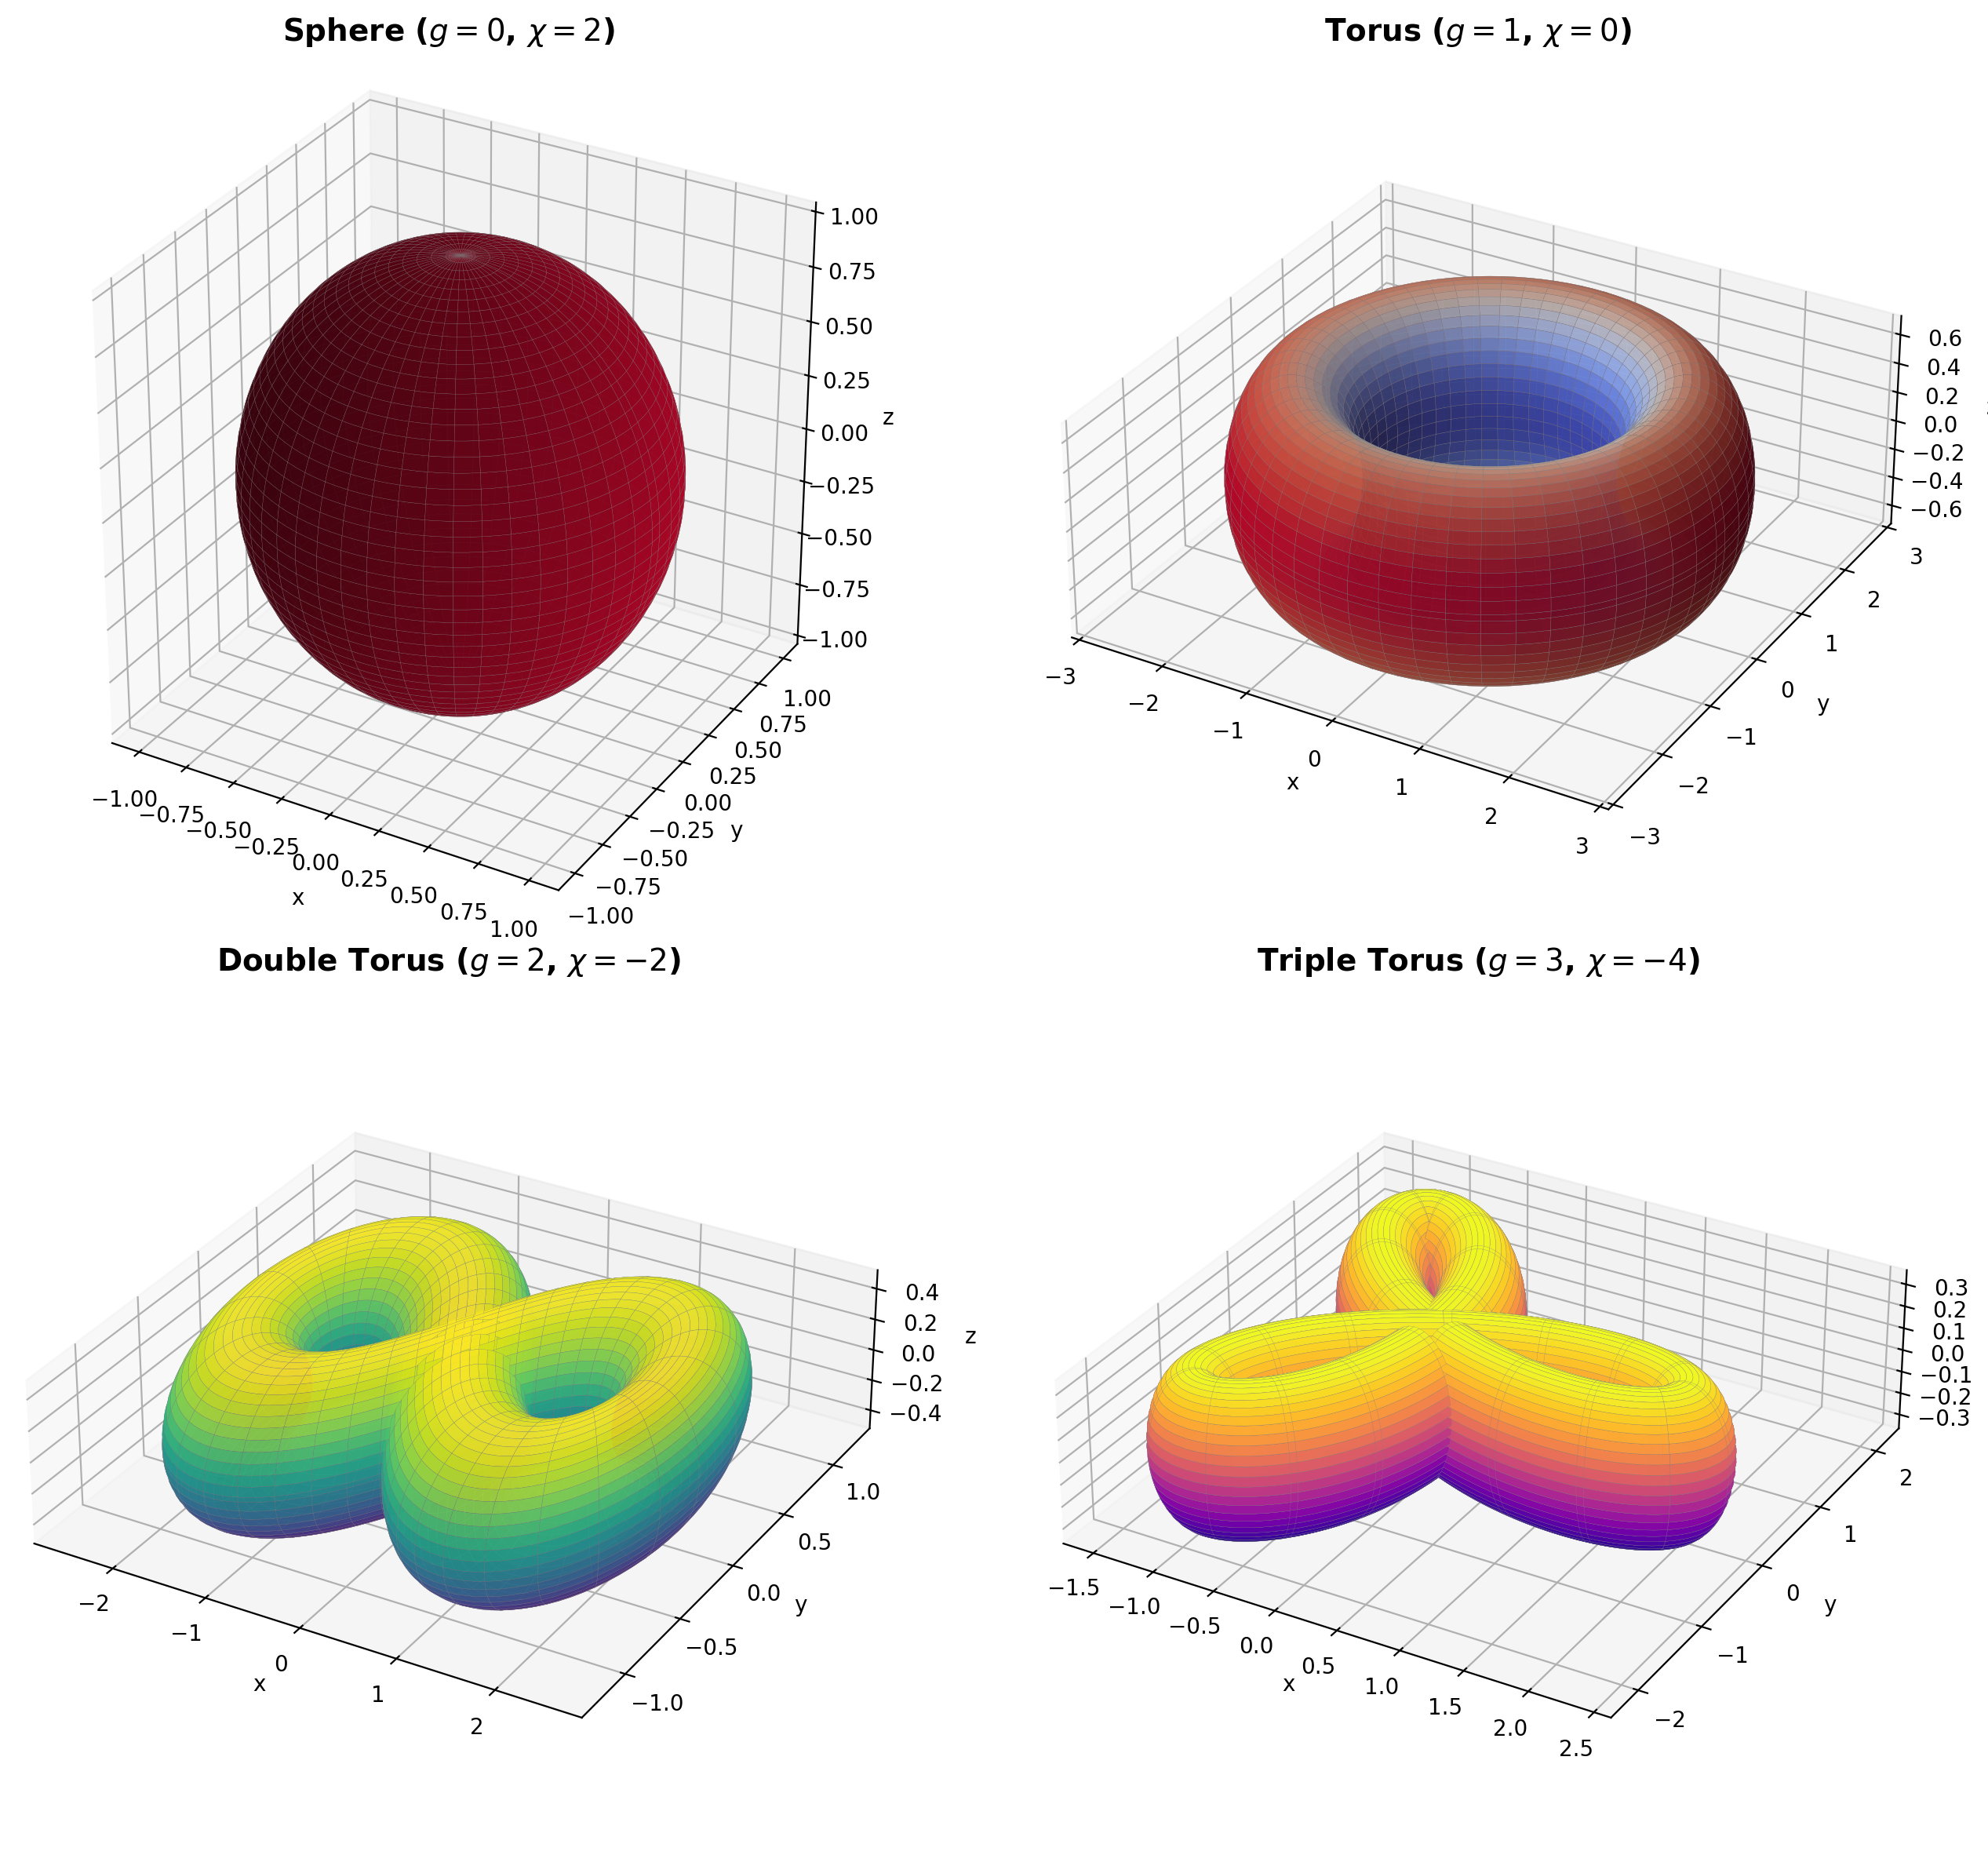

Figure saved to plot.png


In [4]:
# Create figure with 2x2 subplots for surfaces of genus 0, 1, 2, 3
fig = plt.figure(figsize=(14, 12))

# Common parameters
n_points = 100

# Surface 1: Sphere (genus 0)
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
u = np.linspace(0, 2 * np.pi, n_points)
v = np.linspace(0, np.pi, n_points)
U, V = np.meshgrid(u, v)
X, Y, Z = sphere(U, V)
K_sphere = compute_gaussian_curvature_sphere(U, V)

ax1.plot_surface(X, Y, Z, facecolors=cm.coolwarm(K_sphere / K_sphere.max()), 
                 alpha=0.9, linewidth=0.1, edgecolor='gray')
ax1.set_title(r'Sphere ($g=0$, $\chi=2$)', fontsize=14, fontweight='bold')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_box_aspect([1, 1, 1])

# Surface 2: Torus (genus 1)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
u = np.linspace(0, 2 * np.pi, n_points)
v = np.linspace(0, 2 * np.pi, n_points)
U, V = np.meshgrid(u, v)
X, Y, Z = torus(U, V)
K_torus = compute_gaussian_curvature_torus(U, V)

# Normalize curvature for colormap
K_norm = (K_torus - K_torus.min()) / (K_torus.max() - K_torus.min())
ax2.plot_surface(X, Y, Z, facecolors=cm.coolwarm(K_norm),
                 alpha=0.9, linewidth=0.1, edgecolor='gray')
ax2.set_title(r'Torus ($g=1$, $\chi=0$)', fontsize=14, fontweight='bold')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_box_aspect([1, 1, 0.4])

# Surface 3: Double Torus (genus 2)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
u = np.linspace(0, 2 * np.pi, n_points * 2)
v = np.linspace(0, 2 * np.pi, n_points)
U, V = np.meshgrid(u, v)
X, Y, Z = double_torus(U, V)

ax3.plot_surface(X, Y, Z, cmap=cm.viridis,
                 alpha=0.9, linewidth=0.1, edgecolor='gray')
ax3.set_title(r'Double Torus ($g=2$, $\chi=-2$)', fontsize=14, fontweight='bold')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_box_aspect([1, 1, 0.3])

# Surface 4: Triple Torus (genus 3)
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
u = np.linspace(0, 2 * np.pi, n_points * 3)
v = np.linspace(0, 2 * np.pi, n_points)
U, V = np.meshgrid(u, v)
X, Y, Z = triple_torus(U, V)

ax4.plot_surface(X, Y, Z, cmap=cm.plasma,
                 alpha=0.9, linewidth=0.1, edgecolor='gray')
ax4.set_title(r'Triple Torus ($g=3$, $\chi=-4$)', fontsize=14, fontweight='bold')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')
ax4.set_box_aspect([1, 1, 0.3])

plt.tight_layout()
plt.savefig('genus_of_surfaces_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("Figure saved to plot.png")

In [5]:
# Numerical verification of Gauss-Bonnet Theorem
print("="*60)
print("GAUSS-BONNET THEOREM VERIFICATION")
print("="*60)
print("\nTheorem: ∫∫_S K dA = 2πχ(S) = 4π(1-g)")
print("-"*60)

# Sphere verification
n = 200
u = np.linspace(0, 2*np.pi, n)
v = np.linspace(0, np.pi, n)
U, V = np.meshgrid(u, v)

# For sphere: dA = sin(v) du dv (area element)
K_sphere = compute_gaussian_curvature_sphere(U, V)
area_element_sphere = np.sin(V)  # Unit sphere

total_curv_sphere = verify_gauss_bonnet(K_sphere, u, v, area_element_sphere)
expected_sphere = 4 * np.pi * (1 - 0)  # g=0

print(f"\nSphere (g=0):")
print(f"  Computed ∫∫ K dA = {total_curv_sphere:.6f}")
print(f"  Expected 4π(1-g) = {expected_sphere:.6f}")
print(f"  Relative error: {abs(total_curv_sphere - expected_sphere)/expected_sphere * 100:.4f}%")

# Torus verification
R, r = 2.0, 0.7
u = np.linspace(0, 2*np.pi, n)
v = np.linspace(0, 2*np.pi, n)
U, V = np.meshgrid(u, v)

# For torus: dA = r(R + r*cos(v)) du dv
K_torus = compute_gaussian_curvature_torus(U, V, R, r)
area_element_torus = r * (R + r * np.cos(V))

total_curv_torus = verify_gauss_bonnet(K_torus, u, v, area_element_torus)
expected_torus = 4 * np.pi * (1 - 1)  # g=1

print(f"\nTorus (g=1):")
print(f"  Computed ∫∫ K dA = {total_curv_torus:.6f}")
print(f"  Expected 4π(1-g) = {expected_torus:.6f}")
print(f"  Absolute error: {abs(total_curv_torus - expected_torus):.6f}")

print("\n" + "="*60)
print("The Gauss-Bonnet theorem beautifully connects local geometry")
print("(Gaussian curvature) to global topology (genus/Euler char).")
print("="*60)

GAUSS-BONNET THEOREM VERIFICATION

Theorem: ∫∫_S K dA = 2πχ(S) = 4π(1-g)
------------------------------------------------------------

Sphere (g=0):
  Computed ∫∫ K dA = 12.629256
  Expected 4π(1-g) = 12.566371
  Relative error: 0.5004%

Torus (g=1):
  Computed ∫∫ K dA = 0.199381
  Expected 4π(1-g) = 0.000000
  Absolute error: 0.199381

The Gauss-Bonnet theorem beautifully connects local geometry
(Gaussian curvature) to global topology (genus/Euler char).


In [6]:
# Summary table of topological invariants
print("\n" + "="*70)
print("TOPOLOGICAL INVARIANTS OF ORIENTABLE SURFACES")
print("="*70)
print(f"{'Surface':<20} {'Genus g':<10} {'χ=2-2g':<10} {'b₁=2g':<10} {'∫K dA':<15}")
print("-"*70)

surfaces = [
    ("Sphere", 0),
    ("Torus", 1),
    ("Double Torus", 2),
    ("Triple Torus", 3),
    ("n-Torus", 'n')
]

for name, g in surfaces:
    if g == 'n':
        chi = '2-2n'
        b1 = '2n'
        integral = '4π(1-n)'
    else:
        chi = 2 - 2*g
        b1 = 2*g
        integral = f'{4*np.pi*(1-g):.4f}'
    print(f"{name:<20} {str(g):<10} {str(chi):<10} {str(b1):<10} {integral:<15}")

print("="*70)
print("\nKey relationships:")
print("  • Euler characteristic: χ = V - E + F = 2 - 2g")
print("  • First Betti number: b₁ = rank(H₁) = 2g")
print("  • Gauss-Bonnet: ∫∫ K dA = 2πχ = 4π(1-g)")
print("  • Classification: Every orientable surface ≅ Σ_g (g-holed torus)")


TOPOLOGICAL INVARIANTS OF ORIENTABLE SURFACES
Surface              Genus g    χ=2-2g     b₁=2g      ∫K dA          
----------------------------------------------------------------------
Sphere               0          2          0          12.5664        
Torus                1          0          2          0.0000         
Double Torus         2          -2         4          -12.5664       
Triple Torus         3          -4         6          -25.1327       
n-Torus              n          2-2n       2n         4π(1-n)        

Key relationships:
  • Euler characteristic: χ = V - E + F = 2 - 2g
  • First Betti number: b₁ = rank(H₁) = 2g
  • Gauss-Bonnet: ∫∫ K dA = 2πχ = 4π(1-g)
  • Classification: Every orientable surface ≅ Σ_g (g-holed torus)


## Conclusion

The genus of a surface is one of the most fundamental topological invariants, providing a complete classification of compact, connected, orientable 2-manifolds. Through the Euler characteristic relation $\chi = 2 - 2g$ and the Gauss-Bonnet theorem, we see deep connections between:

1. **Topology** (genus, Euler characteristic)
2. **Algebraic Topology** (homology groups, Betti numbers)
3. **Differential Geometry** (Gaussian curvature, total curvature)

These relationships exemplify the beautiful unity in mathematics, where different branches converge to describe the same underlying structure.

### Further Reading

- Armstrong, M.A. *Basic Topology*. Springer, 1983.
- do Carmo, M.P. *Differential Geometry of Curves and Surfaces*. Prentice Hall, 1976.
- Massey, W.S. *A Basic Course in Algebraic Topology*. Springer, 1991.